# Lab | Imbalanced data

### 0. import libraries

In [2]:

!pip install imblearn

     |████████████████████████████████| 206 kB 5.1 MB/s eta 0:00:01


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

 ### 1. Load the dataset and explore the variables.

In [5]:
df = pd.read_csv('customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### 2. We will try to predict variable `Churn` using a logistic regression on variables `tenure`, `SeniorCitizen`,`MonthlyCharges`.

2.1 standardize the column names

In [8]:
df1 = df[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'Churn']]
df1

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [10]:
# standardize the column into lower case
df1.columns = df1.columns.str.lower()
df1 = df1.rename(columns={'seniorcitizen':'senior_citizen',
                         'monthlycharges' : 'monthly_charges'})
df1

,tenure,senior_citizen,monthly_charges,churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


2.2 Explore the data

In [12]:
df1.shape

(7043, 4)

In [13]:
df1.dtypes

tenure               int64
senior_citizen       int64
monthly_charges    float64
churn               object
dtype: object

In [14]:
df1.describe()

,tenure,senior_citizen,monthly_charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


In [15]:
df1.isna().sum() #nothing to clean up

tenure             0
senior_citizen     0
monthly_charges    0
churn              0
dtype: int64

In [16]:
df1['churn'].value_counts() # check the imbalance of the target variable

No     5174
Yes    1869
Name: churn, dtype: int64

2.3 EDA

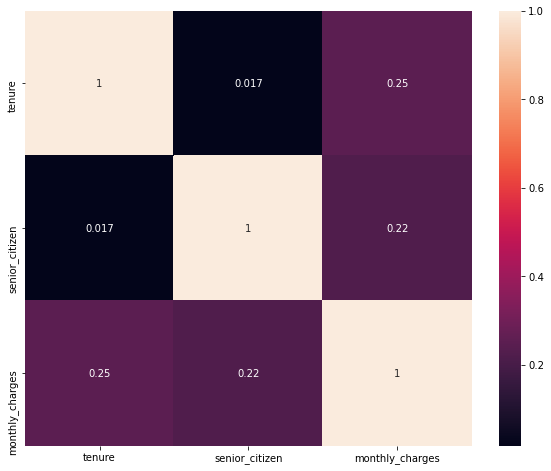

In [18]:
# check correlation
# all columns has low correlation to eachother --> nothing to drop
corr_matrix = df1.corr(method='pearson')  
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

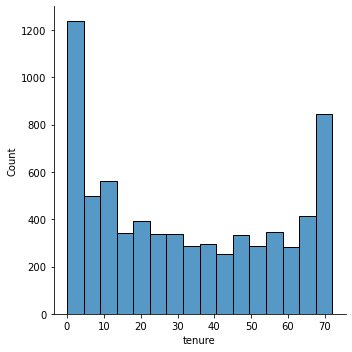

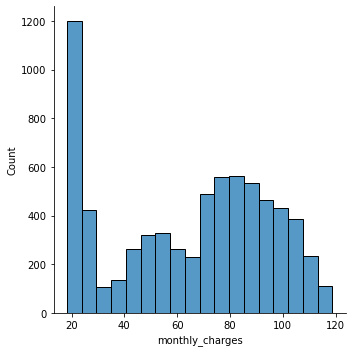

In [22]:
for col in df1.select_dtypes(np.number):
    sns.displot(df1[col])
    plt.show()

In [20]:
# treat the senior_citizen as categorical
df1['senior_citizen'] = df1['senior_citizen'].astype('object')

In [21]:
df1

,tenure,senior_citizen,monthly_charges,churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [31]:
df1.columns

Index(['tenure', 'senior_citizen', 'monthly_charges', 'churn'], dtype='object')

### 3. Extract the target variable.

In [23]:
X = df1.drop('churn', axis =1)
y = df1['churn']

### 4. Extract the independent variables and scale them.

In [24]:
X

,tenure,senior_citizen,monthly_charges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [25]:
# OneHot encoding
X = pd.get_dummies(X, drop_first=True)

In [26]:
X

,tenure,monthly_charges,senior_citizen_1
0,1,29.85,0
1,34,56.95,0
2,2,53.85,0
3,45,42.30,0
4,2,70.70,0
...,...,...,...
7038,24,84.80,0
7039,72,103.20,0
7040,11,29.60,0
7041,4,74.40,1


In [30]:
# scaling: Standardization
transformer = StandardScaler().fit(X)
x_standardized = transformer.transform(X)

X = pd.DataFrame(x_standardized)
X

,0,1,2
0,-1.277445,-1.160323,-0.439916
1,0.066327,-0.259629,-0.439916
2,-1.236724,-0.362660,-0.439916
3,0.514251,-0.746535,-0.439916
4,-1.236724,0.197365,-0.439916
...,...,...,...
7038,-0.340876,0.665992,-0.439916
7039,1.613701,1.277533,-0.439916
7040,-0.870241,-1.168632,-0.439916
7041,-1.155283,0.320338,2.273159


In [33]:
cols = ['tenure', 'monthly_charges','senior_citizen']
X.columns = cols
X

,tenure,monthly_charges,senior_citizen
0,-1.277445,-1.160323,-0.439916
1,0.066327,-0.259629,-0.439916
2,-1.236724,-0.362660,-0.439916
3,0.514251,-0.746535,-0.439916
4,-1.236724,0.197365,-0.439916
...,...,...,...
7038,-0.340876,0.665992,-0.439916
7039,1.613701,1.277533,-0.439916
7040,-0.870241,-1.168632,-0.439916
7041,-1.155283,0.320338,2.273159


### 5. Build the logistic regression model.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

### 6. Evaluate the model.

In [36]:
classification.score(X_test, y_test)

0.8076650106458482

In [37]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[957,  79],
       [192, 181]])

<AxesSubplot:>

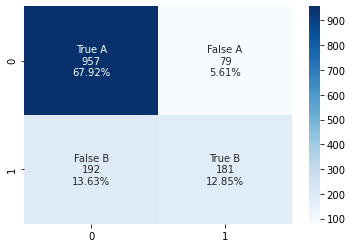

In [43]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 
               'False B', 'True B'
               ]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 7. Even a simple model will give us more than 70% accuracy. Why?

Due to the imbalanced data ratio (See below) the result will tent to be the value (=NO) that is higher. It is similar to when for example there are 99% not fraud, and 1 % fraud. this brings 99% of the chances to not-fraud.

In [44]:
df1['churn'].value_counts() 

No     5174
Yes    1869
Name: churn, dtype: int64

Therefore, it is important to balance the data in the target variable to get a better prediction.

### 8. Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply `imblearn.over_sampling.SMOTE` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [45]:
from imblearn.over_sampling import SMOTE

In [47]:
smote = SMOTE()

X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

Yes    5174
No     5174
Name: churn, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)




In [52]:
X_train

,tenure,monthly_charges,senior_citizen
4541,-1.277445,-0.472339,2.273159
5709,-0.829521,-1.510962,-0.439916
7393,0.104860,-0.870937,-0.439916
10026,-1.114563,0.165178,-0.439916
3578,0.310650,0.011244,-0.439916
...,...,...,...
5734,1.613701,0.818877,-0.439916
5191,-0.381597,0.875378,-0.439916
5390,-0.829521,1.152899,2.273159
860,-0.259435,-1.494344,-0.439916


In [53]:
X_test

,tenure,monthly_charges,senior_citizen
9428,-0.503758,0.833069,-0.439916
4593,-0.870241,-1.477726,-0.439916
5379,0.962175,1.104706,-0.439916
8918,-1.257559,0.372241,2.273159
6448,1.043616,1.325725,-0.439916
...,...,...,...
6425,0.799294,-0.681725,-0.439916
766,-0.422317,0.468238,-0.439916
1144,-1.277445,-0.970878,-0.439916
3065,-1.277445,-0.630210,-0.439916


In [57]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [58]:
classification.score(X_test, y_test)

0.7521739130434782

In [59]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[762, 259],
       [254, 795]])

<AxesSubplot:>

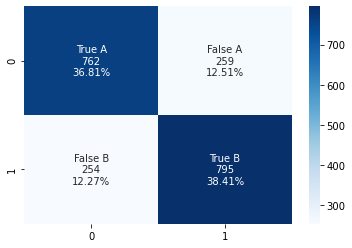

In [60]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 
               'False B', 'True B'
               ]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

### 9. Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process. Apply `imblearn.under_sampling.TomekLinks` to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?

In [61]:
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X, y)
y_tl.value_counts()

No     4694
Yes    1869
Name: churn, dtype: int64

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.2, random_state=42)

In [63]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [64]:

classification.score(X_test, y_test)

0.7989337395277989

In [65]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[846,  78],
       [186, 203]])

<AxesSubplot:>

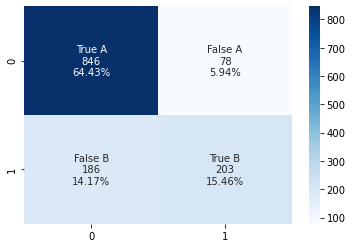

In [66]:
cf_matrix = confusion_matrix(y_test, predictions)
group_names = ['True A', 'False A', 
               'False B', 'True B'
               ]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')